In [1]:
pip install h2o

In [2]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7ih9dyay
  JVM stdout: /tmp/tmp7ih9dyay/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7ih9dyay/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_k8b5kb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
df = h2o.import_file('datasets-provided/train.csv')
df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
24,admin.,married,secondary,no,299,yes,no,cellular,6,may,209,1,321,1,failure,0
27,self-employed,married,secondary,no,-220,yes,no,unknown,26,may,138,2,-1,0,unknown,0
37,blue-collar,married,secondary,no,140,yes,yes,cellular,7,may,490,1,-1,0,unknown,0
36,blue-collar,married,secondary,no,1049,yes,no,cellular,14,may,224,4,-1,0,unknown,1
25,admin.,single,tertiary,no,760,yes,no,cellular,27,may,223,3,89,2,failure,1
31,management,married,secondary,no,466,yes,no,cellular,14,may,164,1,-1,0,unknown,0
49,blue-collar,divorced,primary,no,15,yes,no,unknown,27,may,550,7,-1,0,unknown,0
51,blue-collar,married,primary,no,42,yes,no,cellular,12,may,51,2,342,3,failure,0
60,retired,married,primary,no,55,no,no,cellular,4,jun,207,1,-1,0,unknown,0
32,technician,single,tertiary,no,705,yes,no,cellular,20,apr,20,4,-1,0,unknown,0


In [10]:
df.describe()

Rows:3616
Cols:17




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,19.0,,,,,-3313.0,,,,1.0,,4.0,1.0,-1.0,0.0,,
mean,41.07024336283186,,,,,1394.3014380530976,,,,15.917035398230093,,266.5613938053098,2.7657632743362837,39.87997787610621,0.5381637168141594,,
maxs,86.0,,,,,42045.0,,,,31.0,,2769.0,50.0,871.0,25.0,,
sigma,10.563647026586379,,,,,2811.7507731580295,,,,8.277769569819446,,262.0849483618536,3.0509097341011047,100.59131660634043,1.7259498082353437,,
zeros,0,,,,,284,,,,0,,0,0,0,2963,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,24.0,admin.,married,secondary,no,299.0,yes,no,cellular,6.0,may,209.0,1.0,321.0,1.0,failure,0
1,27.0,self-employed,married,secondary,no,-220.0,yes,no,unknown,26.0,may,138.0,2.0,-1.0,0.0,unknown,0
2,37.0,blue-collar,married,secondary,no,140.0,yes,yes,cellular,7.0,may,490.0,1.0,-1.0,0.0,unknown,0


In [0]:
df['target'] = df['target'].asfactor()

In [0]:
x=df.columns
y='target'
x.remove(y)

In [0]:
train, validate = df.split_frame(ratios=[.75])

In [8]:
aml = H2OAutoML(max_models = 20, seed = 42)
aml.train(x = x, y = y, training_frame = train, validation_frame = validate)

AutoML progress: |
10:35:20.976: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [9]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200530_103520,0.899129,0.249631,0.554602,0.213834,0.271728,0.0738361
StackedEnsemble_AllModels_AutoML_20200530_103520,0.897433,0.250552,0.548503,0.204264,0.2727,0.0743653
GBM_3_AutoML_20200530_103520,0.892859,0.246187,0.533981,0.199732,0.273173,0.0746235
DRF_1_AutoML_20200530_103520,0.891843,0.290093,0.543177,0.199839,0.268307,0.0719885
GBM_4_AutoML_20200530_103520,0.891104,0.250464,0.524314,0.218566,0.274399,0.0752949
XGBoost_grid__1_AutoML_20200530_103520_model_1,0.890943,0.286753,0.524884,0.241702,0.285619,0.0815784
GBM_5_AutoML_20200530_103520,0.888152,0.243058,0.516923,0.225716,0.272096,0.0740363
GBM_2_AutoML_20200530_103520,0.888062,0.24717,0.539107,0.205198,0.272867,0.0744562
GBM_1_AutoML_20200530_103520,0.887677,0.254066,0.514915,0.204137,0.277549,0.0770337
DeepLearning_grid__2_AutoML_20200530_103520_model_1,0.886422,0.256202,0.522752,0.272734,0.276699,0.0765622


In [11]:
aml.modeling_steps

[{'name': 'XGBoost',
  'steps': [{'id': 'def_1', 'weight': 10},
   {'id': 'def_2', 'weight': 10},
   {'id': 'def_3', 'weight': 10}]},
 {'name': 'GLM', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'DRF', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'GBM',
  'steps': [{'id': 'def_1', 'weight': 10},
   {'id': 'def_2', 'weight': 10},
   {'id': 'def_3', 'weight': 10},
   {'id': 'def_4', 'weight': 10},
   {'id': 'def_5', 'weight': 10}]},
 {'name': 'DeepLearning', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'DRF', 'steps': [{'id': 'XRT', 'weight': 10}]},
 {'name': 'XGBoost', 'steps': [{'id': 'grid_1', 'weight': 100}]},
 {'name': 'GBM', 'steps': [{'id': 'grid_1', 'weight': 60}]},
 {'name': 'DeepLearning',
  'steps': [{'id': 'grid_1', 'weight': 20}, {'id': 'grid_2', 'weight': 20}]},
 {'name': 'StackedEnsemble',
  'steps': [{'id': 'best', 'weight': 10}, {'id': 'all', 'weight': 10}]}]

In [0]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [0]:
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

In [14]:
se

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20200530_103520

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.015306773501104189
RMSE: 0.12372054599420497
LogLoss: 0.08484822194840541
Null degrees of freedom: 2696
Residual degrees of freedom: 2691
Null deviance: 1952.5781990496191
Residual deviance: 457.6713091896987
AIC: 469.6713091896987
AUC: 0.9998449221960078
AUCPR: 0.9988628875881416
Gini: 0.9996898443920157

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28382726727916174: 


,,0,1,Error,Rate
0,0,2373.0,7.0,0.0029,(7.0/2380.0)
1,1,4.0,313.0,0.0126,(4.0/317.0)
2,Total,2377.0,320.0,0.0041,(11.0/2697.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.283827,0.982732,210.0
1,max f2,0.209625,0.986924,224.0
2,max f0point5,0.403692,0.990291,197.0
3,max accuracy,0.283827,0.995921,210.0
4,max precision,0.958423,1.000000,0.0
5,max recall,0.209625,1.000000,224.0
6,max specificity,0.958423,1.000000,0.0
7,max absolute_mcc,0.283827,0.980433,210.0
8,max min_per_class_accuracy,0.249296,0.993691,217.0
9,max mean_per_class_accuracy,0.209625,0.995588,224.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score: 12.76 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,0.932884,8.507886,8.507886,1.000000,0.946599,1.000000,0.946599,0.085174,0.085174,750.788644,750.788644
1,,2,0.020022,0.909499,8.507886,8.507886,1.000000,0.922422,1.000000,0.934510,0.085174,0.170347,750.788644,750.788644
2,,3,0.030033,0.871659,8.507886,8.507886,1.000000,0.893976,1.000000,0.920999,0.085174,0.255521,750.788644,750.788644
3,,4,0.040044,0.850177,8.507886,8.507886,1.000000,0.858408,1.000000,0.905351,0.085174,0.340694,750.788644,750.788644
4,,5,0.050056,0.809752,8.507886,8.507886,1.000000,0.832053,1.000000,0.890691,0.085174,0.425868,750.788644,750.788644
5,,6,0.100111,0.513656,8.507886,8.507886,1.000000,0.678495,1.000000,0.784593,0.425868,0.851735,750.788644,750.788644
6,,7,0.150167,0.122110,2.962005,6.659259,0.348148,0.270092,0.782716,0.613093,0.148265,1.000000,196.200491,565.925926
7,,8,0.200222,0.070958,0.000000,4.994444,0.000000,0.091184,0.587037,0.482616,0.000000,1.000000,-100.000000,399.444444
8,,9,0.299963,0.047654,0.000000,3.333745,0.000000,0.056482,0.391842,0.340922,0.000000,1.000000,-100.000000,233.374536
9,,10,0.400074,0.041196,0.000000,2.499537,0.000000,0.043822,0.293791,0.266578,0.000000,1.000000,-100.000000,149.953661




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.06769589921350617
RMSE: 0.2601843562044155
LogLoss: 0.2310787453364102
Null degrees of freedom: 918
Residual degrees of freedom: 913
Null deviance: 633.0135033572444
Residual deviance: 424.722733928322
AIC: 436.722733928322
AUC: 0.9126800976800977
AUCPR: 0.5297376568982881
Gini: 0.8253601953601954

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19931599719891135: 


,,0,1,Error,Rate
0,0,761.0,58.0,0.0708,(58.0/819.0)
1,1,32.0,68.0,0.32,(32.0/100.0)
2,Total,793.0,126.0,0.0979,(90.0/919.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.199316,0.601770,123.0
1,max f2,0.090701,0.681063,188.0
2,max f0point5,0.317548,0.587607,90.0
3,max accuracy,0.317548,0.910773,90.0
4,max precision,0.743093,0.750000,23.0
5,max recall,0.039110,1.000000,330.0
6,max specificity,0.927554,0.998779,0.0
7,max absolute_mcc,0.148143,0.553715,140.0
8,max min_per_class_accuracy,0.085824,0.830000,196.0
9,max mean_per_class_accuracy,0.058443,0.838394,244.0



Gains/Lift Table: Avg response rate: 10.88 %, avg score: 11.13 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010881,0.859912,5.514000,5.514000,0.600000,0.898113,0.600000,0.898113,0.06,0.06,451.400000,451.400000
1,,2,0.020675,0.762149,7.147778,6.287895,0.777778,0.811377,0.684211,0.857028,0.07,0.13,614.777778,528.789474
2,,3,0.030468,0.663127,5.105556,5.907857,0.555556,0.727246,0.642857,0.815312,0.05,0.18,410.555556,490.785714
3,,4,0.040261,0.588444,6.126667,5.961081,0.666667,0.616951,0.648649,0.767062,0.06,0.24,512.666667,496.108108
4,,5,0.050054,0.574523,6.126667,5.993478,0.666667,0.581597,0.652174,0.730775,0.06,0.30,512.666667,499.347826
5,,6,0.100109,0.316197,4.994565,5.494022,0.543478,0.430232,0.597826,0.580504,0.25,0.55,399.456522,449.402174
6,,7,0.150163,0.161952,3.196522,4.728188,0.347826,0.233040,0.514493,0.464682,0.16,0.71,219.652174,372.818841
7,,8,0.200218,0.098759,1.398478,3.895761,0.152174,0.125517,0.423913,0.379891,0.07,0.78,39.847826,289.576087
8,,9,0.300326,0.059085,1.198696,2.996739,0.130435,0.077187,0.326087,0.278990,0.12,0.90,19.869565,199.673913
9,,10,0.400435,0.047700,0.399565,2.347446,0.043478,0.052602,0.255435,0.222393,0.04,0.94,-60.043478,134.744565




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.07383605611501491
RMSE: 0.27172790823729337
LogLoss: 0.24963108224138064
Null degrees of freedom: 2696
Residual degrees of freedom: 2691
Null deviance: 1953.360638725976
Residual deviance: 1346.5100576100072
AIC: 1358.5100576100072
AUC: 0.899128515759616
AUCPR: 0.5546020350834459
Gini: 0.7982570315192321

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16027062388352378: 


,,0,1,Error,Rate
0,0,2173.0,207.0,0.087,(207.0/2380.0)
1,1,108.0,209.0,0.3407,(108.0/317.0)
2,Total,2281.0,416.0,0.1168,(315.0/2697.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.160271,0.570259,242.0
1,max f2,0.074332,0.680905,308.0
2,max f0point5,0.358521,0.562818,169.0
3,max accuracy,0.506091,0.899889,116.0
4,max precision,0.946446,1.000000,0.0
5,max recall,0.032829,1.000000,392.0
6,max specificity,0.946446,1.000000,0.0
7,max absolute_mcc,0.160271,0.510336,242.0
8,max min_per_class_accuracy,0.079925,0.823950,302.0
9,max mean_per_class_accuracy,0.074332,0.832697,308.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score: 11.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,0.869118,6.932352,6.932352,0.814815,0.898162,0.814815,0.898162,0.069401,0.069401,593.235191,593.235191
1,,2,0.020022,0.791051,5.671924,6.302138,0.666667,0.832584,0.740741,0.865373,0.056782,0.126183,467.192429,530.213810
2,,3,0.030033,0.733414,5.041710,5.881996,0.592593,0.757313,0.691358,0.829353,0.050473,0.176656,404.171048,488.199556
3,,4,0.040044,0.671859,5.671924,5.829478,0.666667,0.701886,0.685185,0.797486,0.056782,0.233438,467.192429,482.947774
4,,5,0.050056,0.611518,4.726604,5.608903,0.555556,0.645657,0.659259,0.767120,0.047319,0.280757,372.660358,460.890291
5,,6,0.100111,0.350486,4.222433,4.915668,0.496296,0.472727,0.577778,0.619924,0.211356,0.492114,322.243253,391.566772
6,,7,0.150167,0.168381,3.025026,4.285454,0.355556,0.242735,0.503704,0.494194,0.151420,0.643533,202.502629,328.545391
7,,8,0.200222,0.108246,2.016684,3.718261,0.237037,0.136499,0.437037,0.404770,0.100946,0.744479,101.668419,271.826148
8,,9,0.299963,0.064745,1.233485,2.892050,0.144981,0.082436,0.339926,0.297591,0.123028,0.867508,23.348539,189.205040
9,,10,0.400074,0.049725,0.756257,2.357607,0.088889,0.056385,0.277108,0.237234,0.075710,0.943218,-24.374343,135.760708


In [0]:
metalearner = h2o.get_model(se.metalearner()['name'])

In [18]:
metalearner.coef_norm()

{'DRF_1_AutoML_20200530_103520': 0.47266687410980235,
 'DeepLearning_grid__2_AutoML_20200530_103520_model_1': 0.20731592735584192,
 'GBM_3_AutoML_20200530_103520': 0.09103503278396977,
 'GLM_1_AutoML_20200530_103520': 0.05031740241785455,
 'Intercept': -2.5702401064682103,
 'XGBoost_grid__1_AutoML_20200530_103520_model_1': 0.0,
 'XRT_1_AutoML_20200530_103520': 0.4577282600079061}

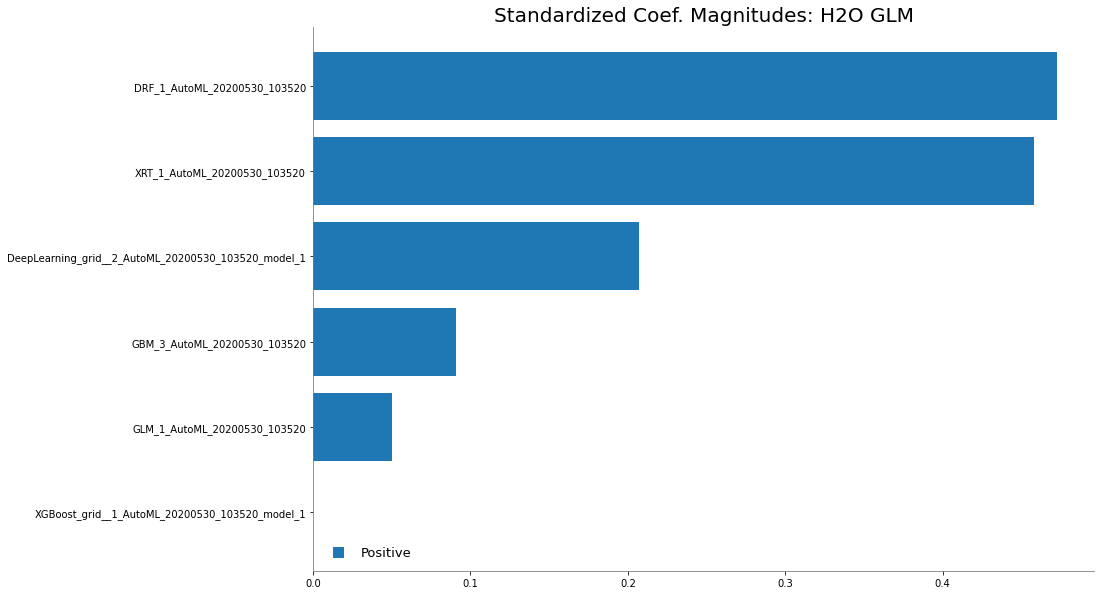

In [19]:
%matplotlib inline
metalearner.std_coef_plot()

In [0]:
se1 = h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][1])

In [16]:
se1

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200530_103520

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.015534466428775531
RMSE: 0.12463733962491148
LogLoss: 0.08577952887967807
Null degrees of freedom: 2696
Residual degrees of freedom: 2686
Null deviance: 1952.5781990496191
Residual deviance: 462.6947787769835
AIC: 484.6947787769835
AUC: 0.9995844710123796
AUCPR: 0.9970269130995595
Gini: 0.9991689420247591

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2897494271531648: 


,,0,1,Error,Rate
0,0,2365.0,15.0,0.0063,(15.0/2380.0)
1,1,3.0,314.0,0.0095,(3.0/317.0)
2,Total,2368.0,329.0,0.0067,(18.0/2697.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.289749,0.972136,203.0
1,max f2,0.289749,0.983093,203.0
2,max f0point5,0.386388,0.978751,186.0
3,max accuracy,0.386388,0.993326,186.0
4,max precision,0.970085,1.000000,0.0
5,max recall,0.194658,1.000000,234.0
6,max specificity,0.970085,1.000000,0.0
7,max absolute_mcc,0.289749,0.968562,203.0
8,max min_per_class_accuracy,0.289749,0.990536,203.0
9,max mean_per_class_accuracy,0.289749,0.992117,203.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score: 13.16 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,0.943015,8.507886,8.507886,1.000000,0.956969,1.000000,0.956969,0.085174,0.085174,750.788644,750.788644
1,,2,0.020022,0.918034,8.507886,8.507886,1.000000,0.931768,1.000000,0.944369,0.085174,0.170347,750.788644,750.788644
2,,3,0.030033,0.889473,8.507886,8.507886,1.000000,0.906298,1.000000,0.931678,0.085174,0.255521,750.788644,750.788644
3,,4,0.040044,0.862573,8.507886,8.507886,1.000000,0.875973,1.000000,0.917752,0.085174,0.340694,750.788644,750.788644
4,,5,0.050056,0.832145,8.507886,8.507886,1.000000,0.847246,1.000000,0.903651,0.085174,0.425868,750.788644,750.788644
5,,6,0.100111,0.524366,8.507886,8.507886,1.000000,0.700021,1.000000,0.801836,0.425868,0.851735,750.788644,750.788644
6,,7,0.150167,0.155866,2.962005,6.659259,0.348148,0.297060,0.782716,0.633577,0.148265,1.000000,196.200491,565.925926
7,,8,0.200222,0.078674,0.000000,4.994444,0.000000,0.108477,0.587037,0.502302,0.000000,1.000000,-100.000000,399.444444
8,,9,0.299963,0.049821,0.000000,3.333745,0.000000,0.060006,0.391842,0.355235,0.000000,1.000000,-100.000000,233.374536
9,,10,0.400074,0.041350,0.000000,2.499537,0.000000,0.044909,0.293791,0.277581,0.000000,1.000000,-100.000000,149.953661




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.06710291504734267
RMSE: 0.2590423035863885
LogLoss: 0.22884914125986494
Null degrees of freedom: 918
Residual degrees of freedom: 908
Null deviance: 633.0135033572444
Residual deviance: 420.62472163563183
AIC: 442.62472163563183
AUC: 0.91493894993895
AUCPR: 0.5290982903785146
Gini: 0.8298778998779

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17681400734231725: 


,,0,1,Error,Rate
0,0,756.0,63.0,0.0769,(63.0/819.0)
1,1,28.0,72.0,0.28,(28.0/100.0)
2,Total,784.0,135.0,0.099,(91.0/919.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.176814,0.612766,129.0
1,max f2,0.126753,0.690559,161.0
2,max f0point5,0.321168,0.588843,92.0
3,max accuracy,0.321168,0.910773,92.0
4,max precision,0.777092,0.739130,21.0
5,max recall,0.037427,1.000000,340.0
6,max specificity,0.938495,0.998779,0.0
7,max absolute_mcc,0.176814,0.565692,129.0
8,max min_per_class_accuracy,0.087650,0.830000,194.0
9,max mean_per_class_accuracy,0.058895,0.838510,249.0



Gains/Lift Table: Avg response rate: 10.88 %, avg score: 11.53 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010881,0.873597,5.514000,5.514000,0.600000,0.909452,0.600000,0.909452,0.06,0.06,451.400000,451.400000
1,,2,0.020675,0.788312,7.147778,6.287895,0.777778,0.826048,0.684211,0.869945,0.07,0.13,614.777778,528.789474
2,,3,0.030468,0.700764,5.105556,5.907857,0.555556,0.751091,0.642857,0.831742,0.05,0.18,410.555556,490.785714
3,,4,0.040261,0.635126,5.105556,5.712703,0.555556,0.665660,0.621622,0.791344,0.05,0.23,410.555556,471.270270
4,,5,0.050054,0.577006,5.105556,5.593913,0.555556,0.608678,0.608696,0.755605,0.05,0.28,410.555556,459.391304
5,,6,0.100109,0.339352,4.994565,5.294239,0.543478,0.463193,0.576087,0.609399,0.25,0.53,399.456522,429.423913
6,,7,0.150163,0.171526,3.795870,4.794783,0.413043,0.249259,0.521739,0.489352,0.19,0.72,279.586957,379.478261
7,,8,0.200218,0.110060,1.398478,3.945707,0.152174,0.137855,0.429348,0.401478,0.07,0.79,39.847826,294.570652
8,,9,0.300326,0.061663,0.899022,2.930145,0.097826,0.078824,0.318841,0.293926,0.09,0.88,-10.097826,193.014493
9,,10,0.400435,0.047444,0.699239,2.372418,0.076087,0.053556,0.258152,0.233834,0.07,0.95,-30.076087,137.241848




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.07436532761274393
RMSE: 0.27270006896358484
LogLoss: 0.25055227018578824
Null degrees of freedom: 2696
Residual degrees of freedom: 2686
Null deviance: 1953.360638725976
Residual deviance: 1351.4789453821415
AIC: 1373.4789453821415
AUC: 0.8974332635262307
AUCPR: 0.5485027925114294
Gini: 0.7948665270524613

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15749764854066411: 


,,0,1,Error,Rate
0,0,2166.0,214.0,0.0899,(214.0/2380.0)
1,1,101.0,216.0,0.3186,(101.0/317.0)
2,Total,2267.0,430.0,0.1168,(315.0/2697.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.157498,0.578313,248.0
1,max f2,0.080665,0.669231,304.0
2,max f0point5,0.255357,0.558297,202.0
3,max accuracy,0.608209,0.898776,92.0
4,max precision,0.956658,1.000000,0.0
5,max recall,0.032494,1.000000,391.0
6,max specificity,0.956658,1.000000,0.0
7,max absolute_mcc,0.157498,0.520346,248.0
8,max min_per_class_accuracy,0.080665,0.823109,304.0
9,max mean_per_class_accuracy,0.071322,0.825134,314.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score: 11.76 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,0.876194,6.932352,6.932352,0.814815,0.903643,0.814815,0.903643,0.069401,0.069401,593.235191,593.235191
1,,2,0.020022,0.785152,5.671924,6.302138,0.666667,0.833297,0.740741,0.868470,0.056782,0.126183,467.192429,530.213810
2,,3,0.030033,0.736314,5.987031,6.197102,0.703704,0.758549,0.728395,0.831830,0.059937,0.186120,498.703120,519.710247
3,,4,0.040044,0.683973,4.411497,5.750701,0.518519,0.709671,0.675926,0.801290,0.044164,0.230284,341.149667,475.070102
4,,5,0.050056,0.627941,4.726604,5.545882,0.555556,0.653277,0.651852,0.771688,0.047319,0.277603,372.660358,454.588153
5,,6,0.100111,0.347201,4.033368,4.789625,0.474074,0.476957,0.562963,0.624322,0.201893,0.479495,303.336838,378.962496
6,,7,0.150167,0.173025,3.592219,4.390490,0.422222,0.244960,0.516049,0.497868,0.179811,0.659306,259.221872,339.048954
7,,8,0.200222,0.111400,1.575535,3.686751,0.185185,0.137061,0.433333,0.407667,0.078864,0.738170,57.553453,268.675079
8,,9,0.299963,0.064639,1.265113,2.881534,0.148699,0.083869,0.338690,0.300001,0.126183,0.864353,26.511322,188.153385
9,,10,0.400074,0.048903,0.756257,2.349722,0.088889,0.055920,0.276182,0.238924,0.075710,0.940063,-24.374343,134.972211


In [0]:
metalearner1 = h2o.get_model(se1.metalearner()['name'])

In [21]:
metalearner1.coef_norm()

{'DRF_1_AutoML_20200530_103520': 0.40765537442393807,
 'DeepLearning_1_AutoML_20200530_103520': 0.0,
 'DeepLearning_grid__1_AutoML_20200530_103520_model_1': 0.0,
 'DeepLearning_grid__2_AutoML_20200530_103520_model_1': 0.11971440487506729,
 'GBM_1_AutoML_20200530_103520': 0.0,
 'GBM_2_AutoML_20200530_103520': 1.8655395130450857e-05,
 'GBM_3_AutoML_20200530_103520': 9.450555851428294e-05,
 'GBM_4_AutoML_20200530_103520': 0.0,
 'GBM_5_AutoML_20200530_103520': 0.21489513386177356,
 'GBM_grid__1_AutoML_20200530_103520_model_1': 0.05100188592816551,
 'GBM_grid__1_AutoML_20200530_103520_model_2': 0.0,
 'GLM_1_AutoML_20200530_103520': 0.006928546986992238,
 'Intercept': -2.582509948058297,
 'XGBoost_1_AutoML_20200530_103520': 0.0,
 'XGBoost_2_AutoML_20200530_103520': 0.0,
 'XGBoost_3_AutoML_20200530_103520': 0.03699310329803349,
 'XGBoost_grid__1_AutoML_20200530_103520_model_1': 0.0,
 'XGBoost_grid__1_AutoML_20200530_103520_model_2': 0.09121466836641698,
 'XGBoost_grid__1_AutoML_20200530_10352

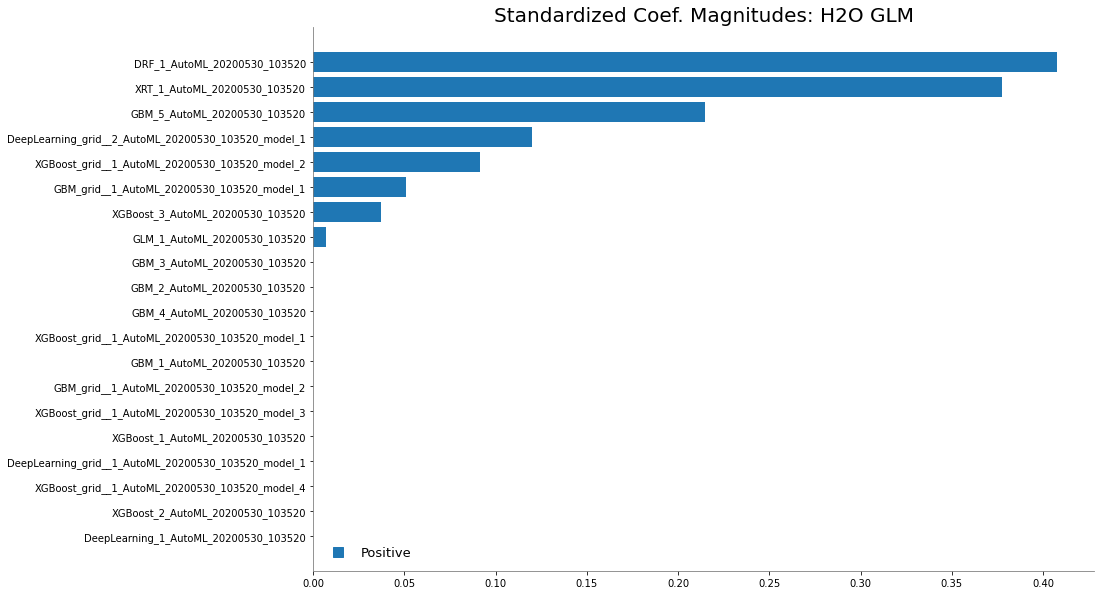

In [22]:
%matplotlib inline
metalearner1.std_coef_plot()

In [0]:
gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [24]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20200530_103520


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,42.0,42.0,26495.0,8.0,8.0,8.0,23.0,78.0,45.357143




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.02313786027691328
RMSE: 0.1521113417103185
LogLoss: 0.0974422483553583
Mean Per-Class Error: 0.036154335551255246
AUC: 0.9930480078466719
AUCPR: 0.9698546523829054
Gini: 0.9860960156933438

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3714105854408439: 


,,0,1,Error,Rate
0,0,2363.0,17.0,0.0071,(17.0/2380.0)
1,1,35.0,282.0,0.1104,(35.0/317.0)
2,Total,2398.0,299.0,0.0193,(52.0/2697.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.371411,0.915584,164.0
1,max f2,0.225599,0.922655,209.0
2,max f0point5,0.455479,0.945848,144.0
3,max accuracy,0.371411,0.980719,164.0
4,max precision,0.971239,1.000000,0.0
5,max recall,0.027831,1.000000,347.0
6,max specificity,0.971239,1.000000,0.0
7,max absolute_mcc,0.371411,0.905204,164.0
8,max min_per_class_accuracy,0.211221,0.962145,214.0
9,max mean_per_class_accuracy,0.211221,0.963846,214.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score: 11.82 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,0.908660,8.507886,8.507886,1.000000,0.937800,1.000000,0.937800,0.085174,0.085174,750.788644,750.788644
1,,2,0.020022,0.879682,8.507886,8.507886,1.000000,0.894780,1.000000,0.916290,0.085174,0.170347,750.788644,750.788644
2,,3,0.030033,0.852093,8.507886,8.507886,1.000000,0.866056,1.000000,0.899545,0.085174,0.255521,750.788644,750.788644
3,,4,0.040044,0.819786,8.507886,8.507886,1.000000,0.837074,1.000000,0.883927,0.085174,0.340694,750.788644,750.788644
4,,5,0.050056,0.795560,8.507886,8.507886,1.000000,0.806759,1.000000,0.868493,0.085174,0.425868,750.788644,750.788644
5,,6,0.100111,0.437745,8.066737,8.287312,0.948148,0.641090,0.974074,0.754792,0.403785,0.829653,706.673677,728.731160
6,,7,0.150167,0.191729,2.709919,6.428181,0.318519,0.292327,0.755556,0.600637,0.135647,0.965300,170.991938,542.818086
7,,8,0.200222,0.114991,0.252086,4.884157,0.029630,0.147655,0.574074,0.487392,0.012618,0.977918,-74.791448,388.415703
8,,9,0.299963,0.059629,0.126511,3.302196,0.014870,0.082738,0.388133,0.352840,0.012618,0.990536,-87.348868,230.219572
9,,10,0.400074,0.034688,0.063021,2.491652,0.007407,0.045403,0.292864,0.275910,0.006309,0.996845,-93.697862,149.165163




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.06904712817932163
RMSE: 0.26276820237487186
LogLoss: 0.22605672354555378
Mean Per-Class Error: 0.16087912087912093
AUC: 0.9111599511599512
AUCPR: 0.4970084931108656
Gini: 0.8223199023199024

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29583183761599796: 


,,0,1,Error,Rate
0,0,769.0,50.0,0.0611,(50.0/819.0)
1,1,39.0,61.0,0.39,(39.0/100.0)
2,Total,808.0,111.0,0.0968,(89.0/919.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.295832,0.578199,102.0
1,max f2,0.098717,0.667752,190.0
2,max f0point5,0.541125,0.583333,59.0
3,max accuracy,0.541125,0.911861,59.0
4,max precision,0.938707,1.000000,0.0
5,max recall,0.020613,1.000000,324.0
6,max specificity,0.938707,1.000000,0.0
7,max absolute_mcc,0.295832,0.524575,102.0
8,max min_per_class_accuracy,0.092012,0.824176,200.0
9,max mean_per_class_accuracy,0.060794,0.839121,240.0



Gains/Lift Table: Avg response rate: 10.88 %, avg score: 11.17 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010881,0.881465,4.595000,4.595000,0.500000,0.904422,0.500000,0.904422,0.05,0.05,359.500000,359.500000
1,,2,0.020675,0.837587,5.105556,4.836842,0.555556,0.858534,0.526316,0.882686,0.05,0.10,410.555556,383.684211
2,,3,0.030468,0.791096,6.126667,5.251429,0.666667,0.817699,0.571429,0.861797,0.06,0.16,512.666667,425.142857
3,,4,0.040261,0.727566,5.105556,5.215946,0.555556,0.750981,0.567568,0.834842,0.05,0.21,410.555556,421.594595
4,,5,0.050054,0.670004,8.168889,5.793696,0.888889,0.693629,0.630435,0.807213,0.08,0.29,716.888889,479.369565
5,,6,0.100109,0.370162,4.794783,5.294239,0.521739,0.519500,0.576087,0.663356,0.24,0.53,379.478261,429.423913
6,,7,0.150163,0.198635,2.397391,4.328623,0.260870,0.286820,0.471014,0.537844,0.12,0.65,139.739130,332.862319
7,,8,0.200218,0.137365,1.997826,3.745924,0.217391,0.164570,0.407609,0.444526,0.10,0.75,99.782609,274.592391
8,,9,0.300326,0.065623,1.398478,2.963442,0.152174,0.094145,0.322464,0.327732,0.14,0.89,39.847826,196.344203
9,,10,0.400435,0.036401,0.699239,2.397391,0.076087,0.049193,0.260870,0.258097,0.07,0.96,-30.076087,139.739130




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.07462352394992082
RMSE: 0.2731730659305943
LogLoss: 0.24618672338984696
Mean Per-Class Error: 0.17843755798849514
AUC: 0.8928591310341171
AUCPR: 0.533980637663008
Gini: 0.7857182620682341

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14659713692750767: 


,,0,1,Error,Rate
0,0,2120.0,260.0,0.1092,(260.0/2380.0)
1,1,92.0,225.0,0.2902,(92.0/317.0)
2,Total,2212.0,485.0,0.1305,(352.0/2697.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.146597,0.561097,238.0
1,max f2,0.070334,0.663240,293.0
2,max f0point5,0.350228,0.564230,158.0
3,max accuracy,0.362896,0.899147,154.0
4,max precision,0.984046,1.000000,0.0
5,max recall,0.004843,1.000000,397.0
6,max specificity,0.984046,1.000000,0.0
7,max absolute_mcc,0.140858,0.504314,241.0
8,max min_per_class_accuracy,0.084432,0.814706,281.0
9,max mean_per_class_accuracy,0.070334,0.821562,293.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score: 10.73 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,0.882050,5.671924,5.671924,0.666667,0.920741,0.666667,0.920741,0.056782,0.056782,467.192429,467.192429
1,,2,0.020022,0.806618,6.932352,6.302138,0.814815,0.843186,0.740741,0.881964,0.069401,0.126183,593.235191,530.213810
2,,3,0.030033,0.734320,5.356817,5.987031,0.629630,0.773344,0.703704,0.845757,0.053628,0.179811,435.681739,498.703120
3,,4,0.040044,0.687125,3.466176,5.356817,0.407407,0.712037,0.629630,0.812327,0.034700,0.214511,246.617596,435.681739
4,,5,0.050056,0.633492,4.726604,5.230775,0.555556,0.662737,0.614815,0.782409,0.047319,0.261830,372.660358,423.077462
5,,6,0.100111,0.357832,4.663582,4.947178,0.548148,0.491371,0.581481,0.636890,0.233438,0.495268,366.358219,394.717841
6,,7,0.150167,0.199472,2.772941,4.222433,0.325926,0.270700,0.496296,0.514827,0.138801,0.634069,177.294076,322.243253
7,,8,0.200222,0.124599,2.205748,3.718261,0.259259,0.156111,0.437037,0.425148,0.110410,0.744479,120.574834,271.826148
8,,9,0.299963,0.064800,1.170230,2.871017,0.137546,0.090587,0.337454,0.313903,0.116719,0.861199,17.022973,187.101730
9,,10,0.400074,0.036385,0.598703,2.302412,0.070370,0.048864,0.270621,0.247582,0.059937,0.921136,-40.129688,130.241227




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8883962,0.010976009,0.8962963,0.8759259,0.89239335,0.877551,0.8998145
1,auc,0.89135486,0.013718808,0.8825065,0.9139463,0.88285154,0.89498484,0.8824851
2,aucpr,0.53529197,0.036636017,0.51551026,0.550539,0.59116447,0.5219817,0.4972643
3,err,0.1116038,0.010976009,0.1037037,0.12407407,0.10760668,0.12244898,0.10018553
4,err_count,60.2,5.9329586,56.0,67.0,58.0,66.0,54.0
5,f0point5,0.542779,0.039185718,0.5,0.5183585,0.5984042,0.5319149,0.5652174
6,f1,0.5780642,0.031458717,0.5254237,0.5889571,0.6081081,0.5769231,0.59090906
7,f2,0.6205642,0.045667693,0.5535714,0.6818182,0.6181319,0.6302521,0.61904764
8,lift_top_group,5.716296,1.1483561,6.6666665,7.142857,4.990741,5.363184,4.4180326
9,logloss,0.24619897,0.017002195,0.22549118,0.23387863,0.26544717,0.26051384,0.24566403



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-30 10:36:12,4.209 sec,0.0,0.322060,0.361991,0.500000,0.117538,1.000000,0.882462,0.311528,0.344403,0.500000,0.108814,1.000,0.891186
1,,2020-05-30 10:36:12,4.280 sec,5.0,0.269301,0.255808,0.943307,0.774877,8.507886,0.076010,0.281237,0.277279,0.875049,0.455404,3.676,0.107726
2,,2020-05-30 10:36:12,4.381 sec,10.0,0.237655,0.206721,0.961720,0.839466,8.507886,0.055988,0.268436,0.251187,0.890788,0.473058,4.595,0.088139
3,,2020-05-30 10:36:12,4.508 sec,15.0,0.217664,0.177285,0.967155,0.866487,8.507886,0.050426,0.264064,0.238453,0.900000,0.480261,4.595,0.084875
4,,2020-05-30 10:36:12,4.611 sec,20.0,0.203253,0.156908,0.974775,0.894678,8.507886,0.041898,0.261081,0.230186,0.905006,0.493897,5.514,0.083787
5,,2020-05-30 10:36:13,4.744 sec,25.0,0.189522,0.138623,0.981215,0.917708,8.507886,0.035966,0.262282,0.228961,0.907125,0.486838,3.676,0.088139
6,,2020-05-30 10:36:13,4.848 sec,30.0,0.176878,0.123214,0.986315,0.938388,8.507886,0.031146,0.261987,0.227381,0.906923,0.489786,5.514,0.110990
7,,2020-05-30 10:36:13,4.949 sec,35.0,0.165584,0.111089,0.990124,0.956109,8.507886,0.025584,0.262404,0.227533,0.907961,0.487967,3.676,0.087051
8,,2020-05-30 10:36:13,5.053 sec,40.0,0.155916,0.101573,0.992057,0.967068,8.507886,0.020022,0.262108,0.226239,0.909011,0.498495,2.757,0.093580
9,,2020-05-30 10:36:13,5.110 sec,42.0,0.152111,0.097442,0.993048,0.969855,8.507886,0.019281,0.262768,0.226057,0.911160,0.497008,4.595,0.096844



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,300.922302,1.000000,0.321799
1,month,145.885956,0.484796,0.156007
2,job,106.798729,0.354905,0.114208
3,poutcome,100.508408,0.334001,0.107481
4,age,56.186703,0.186715,0.060085
5,day,54.120747,0.179850,0.057875
6,balance,46.184929,0.153478,0.049389
7,pdays,33.132874,0.110104,0.035431
8,contact,21.676632,0.072034,0.023180
9,marital,18.388983,0.061109,0.019665


In [0]:
dl = h2o.get_model([mid for mid in model_ids if "DeepLearning" in mid][0])

In [26]:
dl

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__2_AutoML_20200530_103520_model_1


Status of Neuron Layers: predicting target, 2-class classification, bernoulli distribution, CrossEntropy loss, 282,002 weights/biases, 3.2 MB, 176,826 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,60,Input,0,,,,,,,,,
1,,2,500,RectifierDropout,20,0,0,0.148107,0.360818,0,-0.00248333,0.0616451,0.479288,0.048413
2,,3,500,RectifierDropout,20,0,0,0.0119123,0.0524044,0,-0.00601291,0.0471637,0.97441,0.0435237
3,,4,2,Softmax,,0,0,0.00122003,0.000886916,0,0.00652193,0.240723,-0.00050254,0.0308948




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.06321639817349547
RMSE: 0.25142871390017385
LogLoss: 0.21565323831674613
Mean Per-Class Error: 0.1400988786681865
AUC: 0.9347738780054609
AUCPR: 0.7044303146612525
Gini: 0.8695477560109217

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14075039726259952: 


,,0,1,Error,Rate
0,0,2227.0,153.0,0.0643,(153.0/2380.0)
1,1,89.0,228.0,0.2808,(89.0/317.0)
2,Total,2316.0,381.0,0.0897,(242.0/2697.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.140750,0.653295,238.0
1,max f2,0.059115,0.728942,302.0
2,max f0point5,0.398007,0.692619,119.0
3,max accuracy,0.357460,0.922136,135.0
4,max precision,0.979942,1.000000,0.0
5,max recall,0.000111,1.000000,398.0
6,max specificity,0.979942,1.000000,0.0
7,max absolute_mcc,0.140750,0.605619,238.0
8,max min_per_class_accuracy,0.054874,0.854890,307.0
9,max mean_per_class_accuracy,0.059115,0.859901,302.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score:  7.25 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,8.537150e-01,7.877673,7.877673,0.925926,0.918493,0.925926,0.918493,0.078864,0.078864,687.767263,687.767263
1,,2,0.020022,7.315254e-01,7.877673,7.877673,0.925926,0.791188,0.925926,0.854841,0.078864,0.157729,687.767263,687.767263
2,,3,0.030033,6.145063e-01,7.562566,7.772637,0.888889,0.680321,0.913580,0.796667,0.075710,0.233438,656.256572,677.263699
3,,4,0.040044,5.448419e-01,7.247459,7.641342,0.851852,0.582877,0.898148,0.743220,0.072555,0.305994,624.745882,664.134245
4,,5,0.050056,4.704664e-01,5.671924,7.247459,0.666667,0.508790,0.851852,0.696334,0.056782,0.362776,467.192429,624.745882
5,,6,0.100111,2.334193e-01,4.159411,5.703435,0.488889,0.343938,0.670370,0.520136,0.208202,0.570978,315.941115,470.343498
6,,7,0.150167,1.244724e-01,3.214090,4.873653,0.377778,0.179157,0.572840,0.406476,0.160883,0.731861,221.409043,387.365346
7,,8,0.200222,7.182334e-02,1.701577,4.080634,0.200000,0.096066,0.479630,0.328874,0.085174,0.817035,70.157729,308.063442
8,,9,0.299963,2.389059e-02,0.917207,3.028766,0.107807,0.043084,0.355995,0.233846,0.091483,0.908517,-8.279291,202.876550
9,,10,0.400074,8.598555e-03,0.693235,2.444342,0.081481,0.014758,0.287303,0.179023,0.069401,0.977918,-30.676481,144.434179




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.07105674073915912
RMSE: 0.2665647027255468
LogLoss: 0.25779494667198954
Mean Per-Class Error: 0.16805860805860806
AUC: 0.8994200244200244
AUCPR: 0.5293836078497167
Gini: 0.7988400488400489

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18089152520217716: 


,,0,1,Error,Rate
0,0,773.0,46.0,0.0562,(46.0/819.0)
1,1,41.0,59.0,0.41,(41.0/100.0)
2,Total,814.0,105.0,0.0947,(87.0/919.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.180892,0.575610,102.0
1,max f2,0.020984,0.661654,242.0
2,max f0point5,0.335474,0.595930,60.0
3,max accuracy,0.342614,0.914037,56.0
4,max precision,0.655853,0.760000,24.0
5,max recall,0.000110,1.000000,394.0
6,max specificity,0.909872,0.998779,0.0
7,max absolute_mcc,0.180892,0.522566,102.0
8,max min_per_class_accuracy,0.031922,0.816850,216.0
9,max mean_per_class_accuracy,0.020984,0.831941,242.0



Gains/Lift Table: Avg response rate: 10.88 %, avg score:  6.54 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010881,7.835887e-01,5.514000,5.514000,0.600000,0.844716,0.600000,0.844716,0.06,0.06,451.400000,451.400000
1,,2,0.020675,7.106202e-01,7.147778,6.287895,0.777778,0.745571,0.684211,0.797753,0.07,0.13,614.777778,528.789474
2,,3,0.030468,6.101036e-01,6.126667,6.236071,0.666667,0.658530,0.678571,0.753002,0.06,0.19,512.666667,523.607143
3,,4,0.040261,4.670562e-01,7.147778,6.457838,0.777778,0.553318,0.702703,0.704431,0.07,0.26,614.777778,545.783784
4,,5,0.050054,3.898146e-01,6.126667,6.393043,0.666667,0.441994,0.695652,0.653084,0.06,0.32,512.666667,539.304348
5,,6,0.100109,2.149954e-01,4.395217,5.394130,0.478261,0.297534,0.586957,0.475309,0.22,0.54,339.521739,439.413043
6,,7,0.150163,1.147623e-01,2.197609,4.328623,0.239130,0.159734,0.471014,0.370117,0.11,0.65,119.760870,332.862319
7,,8,0.200218,6.543688e-02,1.997826,3.745924,0.217391,0.083958,0.407609,0.298577,0.10,0.75,99.782609,274.592391
8,,9,0.300326,1.901573e-02,1.298587,2.930145,0.141304,0.035961,0.318841,0.211039,0.13,0.88,29.858696,193.014493
9,,10,0.400435,7.519315e-03,0.399565,2.297500,0.043478,0.012102,0.250000,0.161305,0.04,0.92,-60.043478,129.750000




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.07656216975404667
RMSE: 0.2766986985044322
LogLoss: 0.25620178795273374
Mean Per-Class Error: 0.18809479627813275
AUC: 0.8864220767171223
AUCPR: 0.5227523693338272
Gini: 0.7728441534342445

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3741099961053152: 


,,0,1,Error,Rate
0,0,2238.0,142.0,0.0597,(142.0/2380.0)
1,1,154.0,163.0,0.4858,(154.0/317.0)
2,Total,2392.0,305.0,0.1098,(296.0/2697.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.374110,0.524116,165.0
1,max f2,0.057733,0.647668,317.0
2,max f0point5,0.592534,0.545362,97.0
3,max accuracy,0.746125,0.900630,53.0
4,max precision,0.854615,0.813953,28.0
5,max recall,0.000061,1.000000,399.0
6,max specificity,0.998374,0.999580,0.0
7,max absolute_mcc,0.374110,0.462223,165.0
8,max min_per_class_accuracy,0.080875,0.797059,298.0
9,max mean_per_class_accuracy,0.057733,0.811905,317.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score: 11.08 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,9.074888e-01,6.617245,6.617245,0.777778,0.945867,0.777778,0.945867,0.066246,0.066246,561.724501,561.724501
1,,2,0.020022,8.195900e-01,6.932352,6.774798,0.814815,0.863892,0.796296,0.904880,0.069401,0.135647,593.235191,577.479846
2,,3,0.030033,7.542884e-01,6.302138,6.617245,0.740741,0.790282,0.777778,0.866681,0.063091,0.198738,530.213810,561.724501
3,,4,0.040044,6.989040e-01,4.096390,5.987031,0.481481,0.729241,0.703704,0.832321,0.041009,0.239748,309.638977,498.703120
4,,5,0.050056,6.421559e-01,4.096390,5.608903,0.481481,0.669758,0.659259,0.799808,0.041009,0.280757,309.638977,460.890291
5,,6,0.100111,4.258479e-01,3.718261,4.663582,0.437037,0.525597,0.548148,0.662703,0.186120,0.466877,271.826148,366.358219
6,,7,0.150167,2.430296e-01,2.331791,3.886318,0.274074,0.324706,0.456790,0.550037,0.116719,0.583596,133.179110,288.631850
7,,8,0.200222,1.490309e-01,2.142727,3.450421,0.251852,0.191824,0.405556,0.460484,0.107256,0.690852,114.272695,245.042061
8,,9,0.299963,6.397287e-02,1.423252,2.776368,0.167286,0.100320,0.326329,0.340726,0.141956,0.832808,42.325238,177.636838
9,,10,0.400074,2.898074e-02,0.819278,2.286642,0.096296,0.044520,0.268767,0.266606,0.082019,0.914826,-18.072205,128.664232




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8872803,0.022633309,0.8962963,0.8833333,0.851577,0.89239335,0.9128015
1,auc,0.8885465,0.0055864225,0.8788866,0.8902033,0.8904354,0.8897989,0.8934083
2,aucpr,0.52936476,0.050600506,0.46508828,0.48799607,0.54524493,0.5819205,0.566574
3,err,0.112719715,0.022633309,0.1037037,0.11666667,0.148423,0.10760668,0.08719852
4,err_count,60.8,12.194261,56.0,63.0,80.0,58.0,47.0
5,f0point5,0.5374645,0.051380504,0.4931973,0.51532036,0.49804688,0.5685131,0.6122449
6,f1,0.5487269,0.025332201,0.50877196,0.540146,0.5604396,0.5735294,0.5607477
7,f2,0.56588537,0.049424745,0.5253623,0.5674847,0.6407035,0.57863504,0.51724136
8,lift_top_group,6.6035905,1.8452746,8.333333,4.285714,4.990741,8.044776,7.363388
9,logloss,0.2562069,0.020873195,0.23380423,0.2648558,0.28325036,0.26272297,0.23640108



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-30 11:06:33,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-05-30 11:06:37,22 min 19.344 sec,335 obs/sec,0.541713,1,1461.0,0.330288,0.720247,-0.051747,0.862527,0.455306,5.041710,0.135706,0.316657,0.643096,-0.034013,0.871062,0.476511,5.514,0.127312
2,,2020-05-30 11:06:55,22 min 37.529 sec,348 obs/sec,2.713385,5,7318.0,0.281926,0.288551,0.233704,0.890736,0.520251,5.041710,0.125695,0.269773,0.253816,0.249510,0.898999,0.543121,8.271,0.105550
3,,2020-05-30 11:07:14,22 min 55.891 sec,344 obs/sec,4.857990,9,13102.0,0.278842,0.287714,0.250380,0.896921,0.534995,5.041710,0.120133,0.267857,0.253345,0.260133,0.903584,0.559275,8.271,0.103373
4,,2020-05-30 11:07:30,23 min 11.771 sec,359 obs/sec,6.987764,13,18846.0,0.274193,0.267261,0.275167,0.901618,0.553252,5.356817,0.104931,0.264410,0.241936,0.279056,0.905433,0.569441,8.271,0.093580
5,,2020-05-30 11:07:45,23 min 26.936 sec,372 obs/sec,9.135706,17,24639.0,0.275118,0.267781,0.270269,0.904390,0.554527,5.671924,0.108268,0.267769,0.251439,0.260618,0.900574,0.557032,8.271,0.101197
6,,2020-05-30 11:08:02,23 min 44.054 sec,389 obs/sec,11.819800,22,31878.0,0.282710,0.294654,0.229436,0.906697,0.573961,6.617245,0.122729,0.274140,0.269012,0.225016,0.912320,0.567505,6.433,0.097933
7,,2020-05-30 11:08:18,23 min 59.975 sec,405 obs/sec,14.501669,27,39111.0,0.265380,0.232952,0.321012,0.909748,0.565495,6.302138,0.097887,0.259050,0.221602,0.307988,0.907063,0.576825,8.271,0.093580
8,,2020-05-30 11:08:33,24 min 15.052 sec,422 obs/sec,17.210975,32,46418.0,0.285075,0.298921,0.216490,0.913337,0.575870,6.302138,0.101224,0.274275,0.279927,0.224254,0.907399,0.570835,7.352,0.083787
9,,2020-05-30 11:08:50,24 min 31.718 sec,440 obs/sec,20.439377,38,55125.0,0.258769,0.219682,0.354419,0.914632,0.609224,6.932352,0.119392,0.258984,0.224547,0.308338,0.899200,0.553578,7.352,0.093580



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,poutcome.unknown,1.000000,1.000000,0.022411
1,campaign,0.985570,0.985570,0.022088
2,month.apr,0.974060,0.974060,0.021830
3,poutcome.success,0.962008,0.962008,0.021560
4,balance,0.952637,0.952637,0.021350
5,month.aug,0.933844,0.933844,0.020929
6,marital.married,0.932985,0.932985,0.020910
7,month.mar,0.931607,0.931607,0.020879
8,education.secondary,0.930362,0.930362,0.020851
9,month.jan,0.927740,0.927740,0.020792



See the whole table with table.as_data_frame()


In [0]:
se_file_path = h2o.save_model(se, path = "./bin")
se1_file_path = h2o.save_model(se1, path = "./bin")
gbm_file_path = h2o.save_model(gbm, path = "./bin")

In [28]:
se_file_path

'/content/bin/StackedEnsemble_BestOfFamily_AutoML_20200530_103520'

In [29]:
se1_file_path

'/content/bin/StackedEnsemble_AllModels_AutoML_20200530_103520'

In [30]:
gbm_file_path

'/content/bin/GBM_3_AutoML_20200530_103520'